In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn import metrics
# pip install graphviz
# conda install python-graphviz

In [2]:
matplotlib.rcParams.update({'font.size': 18,
                           'lines.linewidth' : 3,
                           'figure.figsize' : [15, 5],
                           'lines.markersize': 10})
pd.options.mode.chained_assignment = None


# Load our data

In [3]:
df_titanic = pd.read_csv('./00_data/titanic.csv')

In [4]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"DiCaprio, Mr. Leonardo",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Some quick data exploration

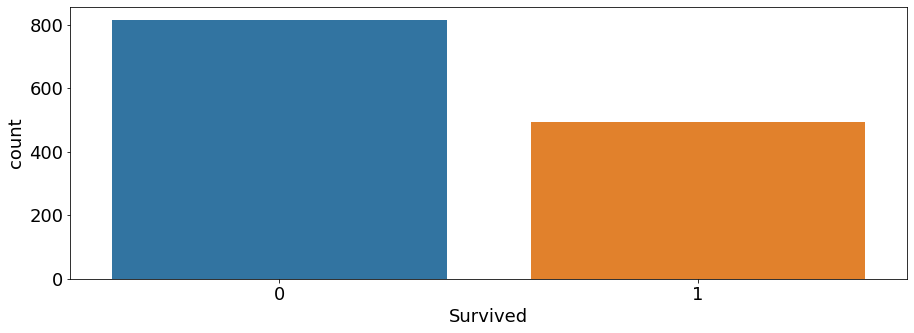

In [5]:
sns.countplot('Survived',data=df_titanic);

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

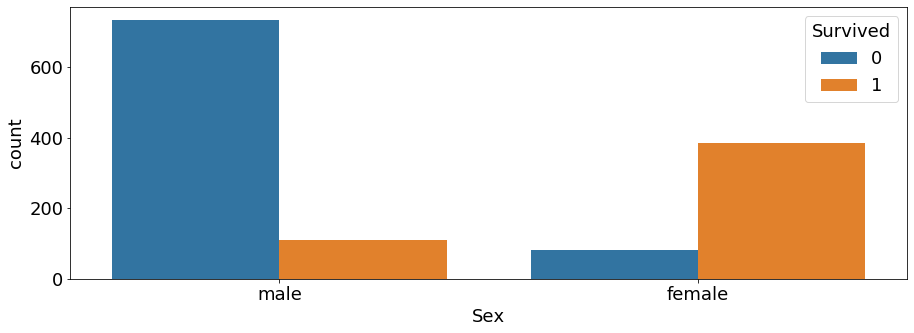

In [7]:
sns.countplot('Sex',hue='Survived',data=df_titanic);

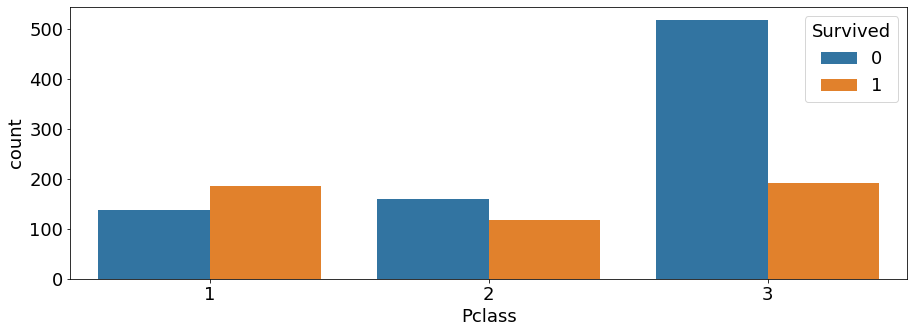

In [8]:
sns.countplot('Pclass',hue='Survived',data=df_titanic);

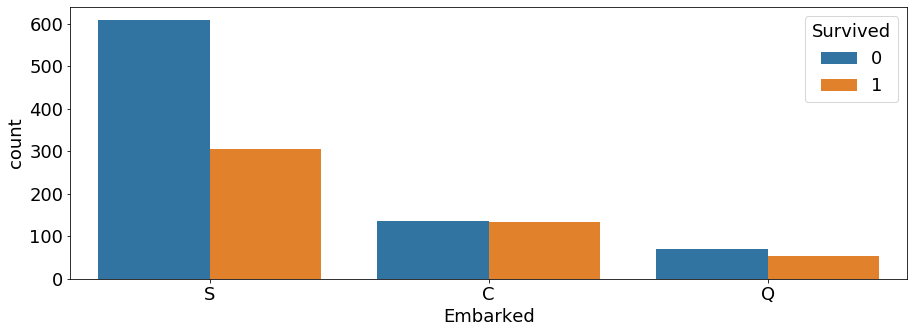

In [9]:
sns.countplot('Embarked',hue='Survived',data=df_titanic);

# Pre-Processing


## Inputing missing data
Looking at our Titanic dataset, the feature for **cabin** clearly indicates that we have `NaN` values. We need to handle these and any other null columns.

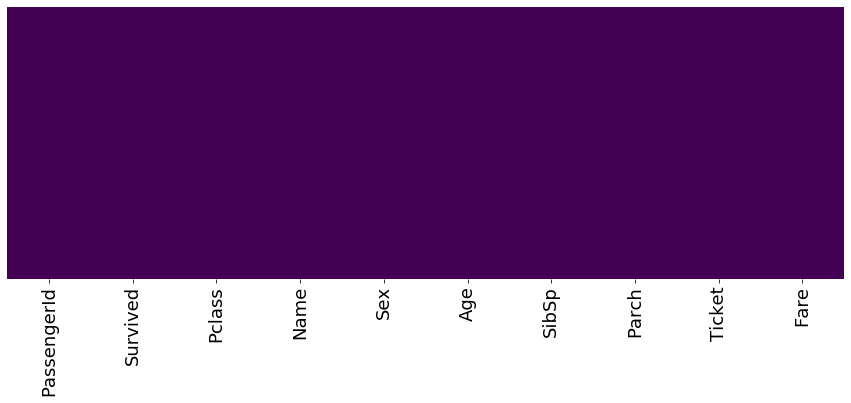

In [32]:
sns.heatmap(df_titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [17]:
# drop cabin, embarked

df_titanic.drop('Cabin', axis=1, inplace=True)


In [18]:
df_titanic.drop('Embarked', axis=1, inplace=True)

In [20]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"DiCaprio, Mr. Leonardo",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [29]:
# mean age

round(np.mean(df_titanic['Age']))

30

In [31]:
df_titanic.loc[ df_titanic['Age'].isnull(), 'Age'] = round(np.mean(df_titanic['Age']))

In [33]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"DiCaprio, Mr. Leonardo",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


## Categorical Variables
### Sex - Binary

In [35]:
from collections import Counter

In [36]:
Counter(df_titanic['Sex'])

Counter({'male': 843, 'female': 466})

In [37]:
## use preprocessing LabelEncoder

from sklearn.preprocessing import LabelEncoder


In [39]:
le = LabelEncoder()

In [45]:
df_titanic['Sex'] = le.fit(df_titanic['Sex']).transform(df_titanic['Sex'])

In [46]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"DiCaprio, Mr. Leonardo",1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500


### Embarked - Categorical

In [ ]:
Counter(df_titanic['Embarked'])

In [ ]:
## use preprpcessing OneHotEncoder



In [ ]:
ohe_fitted.categories_

In [ ]:
df_embarked = pd.DataFrame(ohe_fitted.transform(df_titanic[['Embarked']]),
                           columns= [ 'Embarked_{}'.format(ii) for ii in ohe_fitted.categories_[0].tolist()]
                          )
df_embarked.head()

In [ ]:
df_titanic = pd.concat([ df_titanic.drop(['Embarked'], axis=1), df_embarked], axis=1)
df_titanic.head()

## Ordinal Data
What about **pclass** ?

## Continous Data

Sometimes our observations will be very unevenly distributed for a given feature. For example, *ticket* is roughly exponentially distributed. In cases like these it can be useful to transform the values of our features or our target to better highlight trends or to allow for use of models that might not otherwise be applicable.

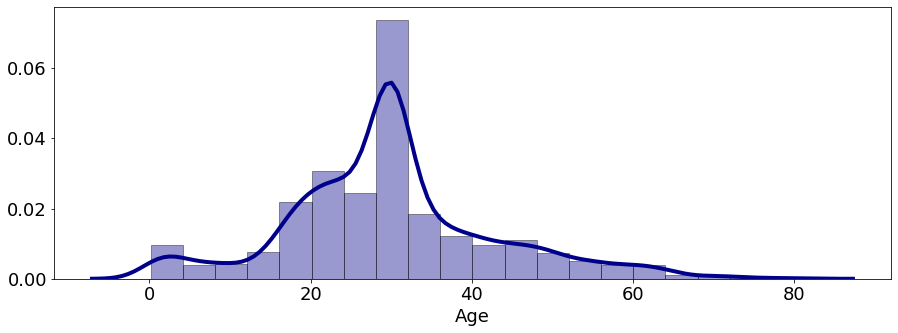

In [47]:
def plotDist(data):
    sns.distplot(data, hist=True, kde=True, bins=20, color = 'darkblue', 
                 hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4});
plotDist(df_titanic['Age'])

In [48]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit_transform(df_titanic[['Age']])

array([[-0.61382191],
       [ 0.62857237],
       [-0.30322334],
       ...,
       [ 0.66739719],
       [ 0.00737523],
       [ 0.00737523]])

In [49]:
## use sklearn.preprocessing StandardScaler

ss = StandardScaler()
ss_transformed = ss.fit_transform(df_titanic[['Age']])
ss_transformed[:10]

array([[-0.61382191],
       [ 0.62857237],
       [-0.30322334],
       [ 0.39562345],
       [ 0.39562345],
       [ 0.00737523],
       [ 1.87096665],
       [-2.16681476],
       [-0.22557369],
       [-1.23501905]])

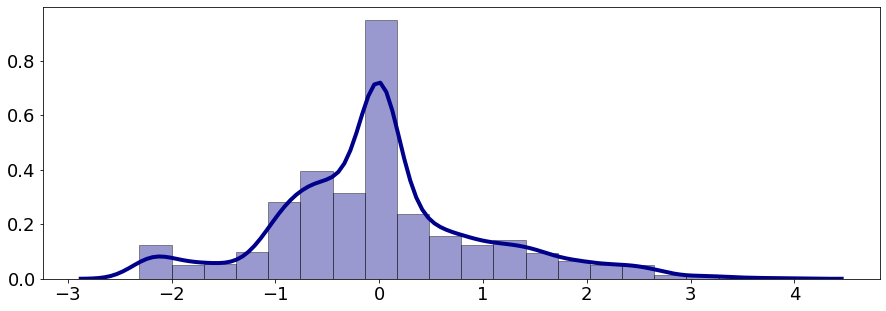

In [50]:
plotDist(ss_transformed)

In [51]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"DiCaprio, Mr. Leonardo",1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500


In [52]:
df_titanic['Age']= ss_transformed

In [53]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"DiCaprio, Mr. Leonardo",1,-0.613822,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.628572,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.303223,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.395623,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,0.395623,0,0,373450,8.0500


## Ready up for modelling

In [54]:
df_target = df_titanic['Survived']
# drop unwanted/redundant columns
df_titanic.drop(['PassengerId', 'Survived','Name','Ticket'], axis=1, inplace=True)
df_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,-0.613822,1,0,7.2500
1,1,0,0.628572,1,0,71.2833
2,3,0,-0.303223,0,0,7.9250
3,1,0,0.395623,1,0,53.1000
4,3,1,0.395623,0,0,8.0500


In [55]:
X = np.array(df_titanic)
X

array([[ 3.00000000e+00,  1.00000000e+00, -6.13821907e-01,
         1.00000000e+00,  0.00000000e+00,  7.25000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  6.28572373e-01,
         1.00000000e+00,  0.00000000e+00,  7.12833000e+01],
       [ 3.00000000e+00,  0.00000000e+00, -3.03223337e-01,
         0.00000000e+00,  0.00000000e+00,  7.92500000e+00],
       ...,
       [ 3.00000000e+00,  1.00000000e+00,  6.67397194e-01,
         0.00000000e+00,  0.00000000e+00,  7.25000000e+00],
       [ 3.00000000e+00,  1.00000000e+00,  7.37523304e-03,
         0.00000000e+00,  0.00000000e+00,  8.05000000e+00],
       [ 3.00000000e+00,  1.00000000e+00,  7.37523304e-03,
         1.00000000e+00,  1.00000000e+00,  2.23583000e+01]])

In [56]:
y = df_target
y[:20]

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    1
Name: Survived, dtype: int64

In [57]:
# save for later user
df_titanic.to_csv('./00_data/titanic_X.csv',index=False)
y.to_csv('./00_data/titanic_y.csv', header=False, index=False)

# Create a train-test split

In [58]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=5)

In [69]:
y.shape

(1309,)

In [70]:
print('X_train : {}'.format(X_train.shape))
print('y_train : {}'.format(y_train.shape))
print('X_test : {}'.format(X_test.shape))
print('y_test : {}'.format(y_test.shape))

X_train : (1047, 6)
y_train : (1047,)
X_test : (262, 6)
y_test : (262,)


# Intro to our first model - Decision Trees
- both classification or regression.
- also outlier detection. 

The trained models resemble a tree, complete with branches and nodes. 

The model is essentially a series of questions with yes or no answers,
- resulting tree structure contains all the combination of responses.

Tree based models are popular:
- mimic human decision making process, 
- work well for a large class of problems, 
- naturally handle multiclassification, and 
- handle a mix of categorical and numerical data. 
- easy to understand and explain : good explainability

## Training decision tree classifiers
The best way to understand a decision tree is to construct one and visualize it. We'll train a decision tree classifier on the iris data set and visualize the tree with the Graphviz package. The iris data set is a famous data set of 150 observations of three different iris species: setosa, versicolor, and virginica. Each observation has measurements of the petal length and width and sepal length and width, for a total of four features.

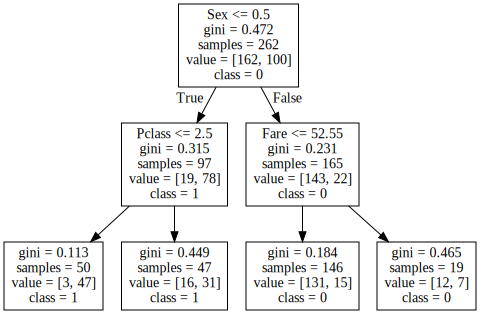

In [72]:
import graphviz
from sklearn.tree import export_graphviz

## use DecisionTreeClassifier of depth 2. fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2,)
tree.fit(X_test, y_test)

# train decision tree
tree


# visual tree
graphviz.Source(export_graphviz(tree, 
                                out_file=None,
                                feature_names=np.array(df_titanic.columns.tolist()),
                                class_names=np.array(['0','1'])))

Note how the model resembles an upside down tree and each box represents a node in the tree. Printed in each box is

* **samples**: the number of observations in the node.
* **Gini**: a measure of node purity.
* **value**: the distribution of observations in each class.
* **class**: the most common label in the node.

At the top of the tree is the __root node__. This node is _split_ to form two branches. Observations that satisfy the criterion printed at the top of the box are moved to one branch while the rest to the other. You can view a decision tree as a model that is making partitions in a space that contains your training data. The partitions are chosen to separate the different classes. For the tree displayed above, node splits were chosen to lead to an overall reduction of the Gini metric, discussed further in the next section. The nodes that do not branch off are called __terminal nodes__ or __leaves__.

With a trained tree, predictions are made on an observation by starting at the root and following the path as a result of the criterion in each node. Once at a leaf, the predicted class is the class with the plurality. For example, if an observation has **sex** of 0 (<=0.5) and **pclass** of 0,1,2, it will reside in the left most leaf in the figure. 

Our trained tree model only makes splits using three features, **sex**, **pclass** and **age** making it easy to visualize our model.

## Decision Tree Hyperparameters

| Decision Tree Hyperparameters | Description |
|:---:|---|
|max_depth| The maximum depth of the tree |
|max_features|The number of features to consider when deciding the best split|
|min_samples_split|Minimum number of samples to consider a split on an internal node|
|min_samples_leaf|Minimum number of samples required for a leaf (terminal node)|

- `scikit-learn` documentation or notebook documentation

## Putting it all together

In [74]:
## import DecisionTreeClassifier
## define max_depth 3, max_features=2, min_split=10, min_leaf=20
## dtc_fitted, dtc_pred, dtc_pred_proba


dtc = DecisionTreeClassifier(max_depth=3,
                            max_features=2,
                            min_samples_split=10,
                            min_samples_leaf=20)




In [75]:
dtc.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
dtc_pred

In [ ]:
dtc_pred_proba

In [ ]:
print('Accuracy : {}'.format(metrics.accuracy_score(y_true=y_test, y_pred=dtc_pred)))
print('Precision : {}'.format(metrics.precision_score(y_test, dtc_pred)))
print('Recall : {}'.format(metrics.recall_score(y_test, dtc_pred)))
print('F1-score : {}'.format(metrics.f1_score(y_test, dtc_pred)))
print("Classification Report:")
print(metrics.classification_report(y_test, dtc_pred))
precision, recall, threshold = metrics.precision_recall_curve(y_test, dtc_pred_proba[:,1])
print("Precision-Recall AUC: {}".format(metrics.auc(recall, precision)))
print("Receiver-Operator AUC: {}".format(metrics.roc_auc_score(y_test, dtc_pred_proba[:,1])))

# Save and export your fitted model

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(dtc_fitted, open(filename, 'wb'))